In [12]:
!pip install tensorflow_hub

    100% |████████████████████████████████| 61kB 4.1MB/s ta 0:00:011


In [21]:
import numpy as np
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from PIL import Image
from importlib import reload
import tensorflow as tf
import numpy as np

IMSIZE=224

In [22]:
from keras.preprocessing import image
import os.path as osp
import os
import seaborn as sns
    

test_datagen = image.ImageDataGenerator(rescale=1./255)
directory = '/root/datasets/unpacked_imagenet_pytorch/val'

val_gen = test_datagen.flow_from_directory(directory, target_size=(IMSIZE, IMSIZE), 
                    color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, 
                    shuffle=True, seed=None, save_to_dir=None, 
                    save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')

Found 50000 images belonging to 1000 classes.


899


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


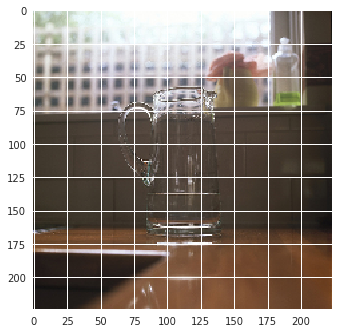

In [23]:
x_batch, y_batch = next(val_gen)
print(np.argmax(y_batch[0]))
plt.imshow(x_batch[0])
plt.show()


# Test on clean data

In [24]:
with tf.Graph().as_default():
    module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v2_50/classification/1")
    x_input = tf.placeholder(tf.float32, shape=[None, IMSIZE, IMSIZE, 3])
    logits = module(x_input)
    with tf.Session() as sess:
        print("Running...")
        preds = sess.run(logits, feed_dict={
            x_input: x_batch[:1],
        })
    print(preds)

INFO:tensorflow:Initialize variable module/resnet_v2_50/block1/unit_1/bottleneck_v2/conv1/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block1/unit_1/bottleneck_v2/conv1/BatchNorm/beta
INFO:tensorflow:Initialize variable module/resnet_v2_50/block1/unit_1/bottleneck_v2/conv1/BatchNorm/gamma:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block1/unit_1/bottleneck_v2/conv1/BatchNorm/gamma
INFO:tensorflow:Initialize variable module/resnet_v2_50/block1/unit_1/bottleneck_v2/conv1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block1/unit_1/bottleneck_v2/conv1/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/resnet_v2_50/block1/unit_1/bottleneck_v2/conv1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec96

INFO:tensorflow:Initialize variable module/resnet_v2_50/block1/unit_2/bottleneck_v2/preact/gamma:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block1/unit_2/bottleneck_v2/preact/gamma
INFO:tensorflow:Initialize variable module/resnet_v2_50/block1/unit_2/bottleneck_v2/preact/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block1/unit_2/bottleneck_v2/preact/moving_mean
INFO:tensorflow:Initialize variable module/resnet_v2_50/block1/unit_2/bottleneck_v2/preact/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block1/unit_2/bottleneck_v2/preact/moving_variance
INFO:tensorflow:Initialize variable module/resnet_v2_50/block1/unit_3/bottleneck_v2/conv1/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/va

INFO:tensorflow:Initialize variable module/resnet_v2_50/block2/unit_1/bottleneck_v2/preact/beta:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block2/unit_1/bottleneck_v2/preact/beta
INFO:tensorflow:Initialize variable module/resnet_v2_50/block2/unit_1/bottleneck_v2/preact/gamma:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block2/unit_1/bottleneck_v2/preact/gamma
INFO:tensorflow:Initialize variable module/resnet_v2_50/block2/unit_1/bottleneck_v2/preact/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block2/unit_1/bottleneck_v2/preact/moving_mean
INFO:tensorflow:Initialize variable module/resnet_v2_50/block2/unit_1/bottleneck_v2/preact/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet

INFO:tensorflow:Initialize variable module/resnet_v2_50/block2/unit_3/bottleneck_v2/conv2/weights:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block2/unit_3/bottleneck_v2/conv2/weights
INFO:tensorflow:Initialize variable module/resnet_v2_50/block2/unit_3/bottleneck_v2/conv3/biases:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block2/unit_3/bottleneck_v2/conv3/biases
INFO:tensorflow:Initialize variable module/resnet_v2_50/block2/unit_3/bottleneck_v2/conv3/weights:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block2/unit_3/bottleneck_v2/conv3/weights
INFO:tensorflow:Initialize variable module/resnet_v2_50/block2/unit_3/bottleneck_v2/preact/beta:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block2/uni

INFO:tensorflow:Initialize variable module/resnet_v2_50/block3/unit_1/bottleneck_v2/conv2/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block3/unit_1/bottleneck_v2/conv2/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/resnet_v2_50/block3/unit_1/bottleneck_v2/conv2/weights:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block3/unit_1/bottleneck_v2/conv2/weights
INFO:tensorflow:Initialize variable module/resnet_v2_50/block3/unit_1/bottleneck_v2/conv3/biases:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block3/unit_1/bottleneck_v2/conv3/biases
INFO:tensorflow:Initialize variable module/resnet_v2_50/block3/unit_1/bottleneck_v2/conv3/weights:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/v

INFO:tensorflow:Initialize variable module/resnet_v2_50/block3/unit_3/bottleneck_v2/conv2/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block3/unit_3/bottleneck_v2/conv2/BatchNorm/beta
INFO:tensorflow:Initialize variable module/resnet_v2_50/block3/unit_3/bottleneck_v2/conv2/BatchNorm/gamma:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block3/unit_3/bottleneck_v2/conv2/BatchNorm/gamma
INFO:tensorflow:Initialize variable module/resnet_v2_50/block3/unit_3/bottleneck_v2/conv2/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block3/unit_3/bottleneck_v2/conv2/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/resnet_v2_50/block3/unit_3/bottleneck_v2/conv2/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec96

INFO:tensorflow:Initialize variable module/resnet_v2_50/block3/unit_5/bottleneck_v2/conv1/weights:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block3/unit_5/bottleneck_v2/conv1/weights
INFO:tensorflow:Initialize variable module/resnet_v2_50/block3/unit_5/bottleneck_v2/conv2/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block3/unit_5/bottleneck_v2/conv2/BatchNorm/beta
INFO:tensorflow:Initialize variable module/resnet_v2_50/block3/unit_5/bottleneck_v2/conv2/BatchNorm/gamma:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block3/unit_5/bottleneck_v2/conv2/BatchNorm/gamma
INFO:tensorflow:Initialize variable module/resnet_v2_50/block3/unit_5/bottleneck_v2/conv2/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/v

INFO:tensorflow:Initialize variable module/resnet_v2_50/block4/unit_1/bottleneck_v2/conv1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block4/unit_1/bottleneck_v2/conv1/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/resnet_v2_50/block4/unit_1/bottleneck_v2/conv1/weights:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block4/unit_1/bottleneck_v2/conv1/weights
INFO:tensorflow:Initialize variable module/resnet_v2_50/block4/unit_1/bottleneck_v2/conv2/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block4/unit_1/bottleneck_v2/conv2/BatchNorm/beta
INFO:tensorflow:Initialize variable module/resnet_v2_50/block4/unit_1/bottleneck_v2/conv2/BatchNorm/gamma:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243

INFO:tensorflow:Initialize variable module/resnet_v2_50/block4/unit_3/bottleneck_v2/conv1/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block4/unit_3/bottleneck_v2/conv1/BatchNorm/beta
INFO:tensorflow:Initialize variable module/resnet_v2_50/block4/unit_3/bottleneck_v2/conv1/BatchNorm/gamma:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block4/unit_3/bottleneck_v2/conv1/BatchNorm/gamma
INFO:tensorflow:Initialize variable module/resnet_v2_50/block4/unit_3/bottleneck_v2/conv1/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec9650f6272f1604e87243296fb1ca54fc/variables/variables' with resnet_v2_50/block4/unit_3/bottleneck_v2/conv1/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/resnet_v2_50/block4/unit_3/bottleneck_v2/conv1/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/5154d5ec96

FailedPreconditionError: Error while reading resource variable module/resnet_v2_50/block4/unit_1/bottleneck_v2/conv1/BatchNorm/moving_mean from Container: localhost. This could mean that the variable was uninitialized. Not found: Container localhost does not exist. (Could not find resource: localhost/module/resnet_v2_50/block4/unit_1/bottleneck_v2/conv1/BatchNorm/moving_mean)
	 [[Node: module_apply_default/resnet_v2_50/block4/unit_1/bottleneck_v2/conv1/BatchNorm/FusedBatchNorm/ReadVariableOp = ReadVariableOp[dtype=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](module/resnet_v2_50/block4/unit_1/bottleneck_v2/conv1/BatchNorm/moving_mean)]]
	 [[Node: module_apply_default/resnet_v2_50/block1/unit_2/bottleneck_v2/conv2/Conv2D/ReadVariableOp/_61 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_327_m...VariableOp", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Caused by op 'module_apply_default/resnet_v2_50/block4/unit_1/bottleneck_v2/conv1/BatchNorm/FusedBatchNorm/ReadVariableOp', defined at:
  File "/root/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/root/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/root/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/root/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/root/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/root/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/root/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/root/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/root/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/root/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-68375543702c>", line 4, in <module>
    logits = module(x_input)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow_hub/module.py", line 203, in __call__
    name=name)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow_hub/native_module.py", line 447, in create_apply_graph
    restore_collections_predicate=(lambda key: key in import_collections))
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1955, in import_meta_graph
    **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/meta_graph.py", line 743, in import_scoped_meta_graph
    producer_op_list=producer_op_list)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 432, in new_func
    return func(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/importer.py", line 513, in import_graph_def
    _ProcessNewOps(graph)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/importer.py", line 303, in _ProcessNewOps
    for new_op in graph._add_new_tf_operations(compute_devices=False):  # pylint: disable=protected-access
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3540, in _add_new_tf_operations
    for c_op in c_api_util.new_tf_operations(self)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3540, in <listcomp>
    for c_op in c_api_util.new_tf_operations(self)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3428, in _create_op_from_tf_operation
    ret = Operation(c_op, self)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Error while reading resource variable module/resnet_v2_50/block4/unit_1/bottleneck_v2/conv1/BatchNorm/moving_mean from Container: localhost. This could mean that the variable was uninitialized. Not found: Container localhost does not exist. (Could not find resource: localhost/module/resnet_v2_50/block4/unit_1/bottleneck_v2/conv1/BatchNorm/moving_mean)
	 [[Node: module_apply_default/resnet_v2_50/block4/unit_1/bottleneck_v2/conv1/BatchNorm/FusedBatchNorm/ReadVariableOp = ReadVariableOp[dtype=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](module/resnet_v2_50/block4/unit_1/bottleneck_v2/conv1/BatchNorm/moving_mean)]]
	 [[Node: module_apply_default/resnet_v2_50/block1/unit_2/bottleneck_v2/conv2/Conv2D/ReadVariableOp/_61 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_327_m...VariableOp", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]


In [14]:
print(hub.load_module_spec("https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/1").get_tags())

[set(), {'train'}]


In [ ]:
pad_mode = 'CONSTANT'
x_input = tf.placeholder(tf.float32, shape=[None, 299, 299, 3])

# Map a transformation onto the input
transform = tf.placeholder(tf.float32, shape=[None, 3])
trans_x, trans_y, rot = tf.unstack(transform, axis=1)
rot *= np.pi / 180 # convert degrees to radians

x = x_input
x = tf.pad(x, [[0,0], [16,16], [16,16], [0,0]], pad_mode)

# rotate and translate image
ones = tf.ones(shape=tf.shape(trans_x))
zeros = tf.zeros(shape=tf.shape(trans_x))
trans = tf.stack([ones,  zeros, -trans_x,
                zeros, ones,  -trans_y,
                zeros, zeros], axis=1)
x = tf.contrib.image.rotate(x, rot, interpolation='BILINEAR')
x = tf.contrib.image.transform(x, trans, interpolation='BILINEAR')
x = tf.image.resize_image_with_crop_or_pad(x, 299, 299)

logits = module

In [54]:
[i for i in logits_op.op.inputs]

[<tf.Tensor 'module_apply_default_1/InceptionResnetV2/Logits/Logits/MatMul:0' shape=(?, 1001) dtype=float32>,
 <tf.Tensor 'module_apply_default_1/InceptionResnetV2/Logits/Logits/BiasAdd/ReadVariableOp:0' shape=(1001,) dtype=float32>]

In [38]:
x = tf.get_default_graph().get_tensor_by_name('transform/ImageProjectiveTransform:0')

In [45]:
x = [output for op in x.consumers() for output in op.outputs][0]

In [46]:
[output for op in x.consumers() for output in op.outputs]

[]

In [36]:
[n.name for n in tf.get_default_graph().as_graph_def().node if 'image' in n.name.lower()]


['rotate/transform/ImageProjectiveTransform',
 'transform/ImageProjectiveTransform',
 'resize_image_with_crop_or_pad/Shape',
 'resize_image_with_crop_or_pad/assert_positive/Const',
 'resize_image_with_crop_or_pad/assert_positive/assert_less/Less',
 'resize_image_with_crop_or_pad/assert_positive/assert_less/Const',
 'resize_image_with_crop_or_pad/assert_positive/assert_less/All',
 'resize_image_with_crop_or_pad/assert_positive/assert_less/Assert/Const',
 'resize_image_with_crop_or_pad/assert_positive/assert_less/Assert/Assert/data_0',
 'resize_image_with_crop_or_pad/assert_positive/assert_less/Assert/Assert',
 'resize_image_with_crop_or_pad/control_dependency',
 'resize_image_with_crop_or_pad/Shape_1',
 'resize_image_with_crop_or_pad/unstack',
 'resize_image_with_crop_or_pad/crop_to_bounding_box/Shape',
 'resize_image_with_crop_or_pad/crop_to_bounding_box/assert_positive/Const',
 'resize_image_with_crop_or_pad/crop_to_bounding_box/assert_positive/assert_less/Less',
 'resize_image_with_c

# Test on spatial transformations

In [5]:
import pgd_attack
import spatial_attack

In [6]:
import keras.backend as K
K.get_session().graph

In [7]:
class Model():
    def __init__(self, pad_mode='CONSTANT'):        
        self.x_input = tf.placeholder(tf.float32, shape=[None, 299, 299, 3])
        self.y_input = tf.placeholder(tf.int64, shape=None)
    
        # Map a transformation onto the input
        self.transform = tf.placeholder(tf.float32, shape=[None, 3])
        trans_x, trans_y, rot = tf.unstack(self.transform, axis=1)
        rot *= np.pi / 180 # convert degrees to radians

        x = self.x_input
        x = tf.pad(x, [[0,0], [16,16], [16,16], [0,0]], pad_mode)
        
        # rotate and translate image
        ones = tf.ones(shape=tf.shape(trans_x))
        zeros = tf.zeros(shape=tf.shape(trans_x))
        trans = tf.stack([ones,  zeros, -trans_x,
                        zeros, ones,  -trans_y,
                        zeros, zeros], axis=1)
        x = tf.contrib.image.rotate(x, rot, interpolation='BILINEAR')
        x = tf.contrib.image.transform(x, trans, interpolation='BILINEAR')
        x = tf.image.resize_image_with_crop_or_pad(x, 299, 299)

        # Run the transformed input through our model
        keras_model = InceptionResNetV2(weights='imagenet', input_tensor=x, include_top=True)
#         keras_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
        
        # TODO: Add data parallelism for speedup
        # keras.utils.multi_gpu_model(model, gpus=None, cpu_merge=True, cpu_relocation=False)
             
        # Construct crossentropy
        softmax_output = keras_model.outputs[0]
        logits = softmax_output.op.inputs[0]
        self.y_xent = tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=self.y_input)
        
        # Helpers
        
        self.is_training = keras.backend.learning_phase()
        self.predictions = tf.argmax(logits, 1)
        self.correct_prediction = tf.equal(self.predictions, self.y_input)
        self.num_correct = tf.reduce_sum(tf.cast(self.correct_prediction, tf.int64))
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))

model = Model()

In [10]:
with tf.Session() as sess:
    print("Running...")
    preds = sess.run(model.predictions, feed_dict={
        model.x_input: x_batch[:1],
        model.transform: [[0,0,30]],
        model.is_training: False,
    })
plt.imshow(preds[0])
plt.show()

Running...


FailedPreconditionError: Attempting to use uninitialized value conv_7b_bn/moving_mean
	 [[Node: conv_7b_bn/moving_mean/read = Identity[T=DT_FLOAT, _class=["loc:@conv_7b_bn/cond/FusedBatchNorm/Switch_2"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv_7b_bn/moving_mean)]]
	 [[Node: resize_image_with_crop_or_pad/assert_positive/assert_less/All/_15 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_960_resize_image_with_crop_or_pad/assert_positive/assert_less/All", tensor_type=DT_BOOL, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'conv_7b_bn/moving_mean/read', defined at:
  File "/root/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/root/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/root/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/root/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/root/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/root/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/root/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/root/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/root/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/root/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7ddf7324844>", line 45, in <module>
    model = Model()
  File "<ipython-input-7-f7ddf7324844>", line 25, in __init__
    keras_model = InceptionResNetV2(weights='imagenet', input_tensor=x)
  File "/root/anaconda3/lib/python3.6/site-packages/keras_applications/inception_resnet_v2.py", line 323, in InceptionResNetV2
    x = conv2d_bn(x, 1536, 1, name='conv_7b')
  File "/root/anaconda3/lib/python3.6/site-packages/keras_applications/inception_resnet_v2.py", line 87, in conv2d_bn
    name=bn_name)(x)
  File "/root/anaconda3/lib/python3.6/site-packages/keras/engine/base_layer.py", line 432, in __call__
    self.build(input_shapes[0])
  File "/root/anaconda3/lib/python3.6/site-packages/keras/layers/normalization.py", line 122, in build
    trainable=False)
  File "/root/anaconda3/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/keras/engine/base_layer.py", line 252, in add_weight
    constraint=constraint)
  File "/root/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 399, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 235, in __init__
    constraint=constraint)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 397, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 142, in identity
    return gen_array_ops.identity(input, name=name)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3187, in identity
    "Identity", input=input, name=name)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value conv_7b_bn/moving_mean
	 [[Node: conv_7b_bn/moving_mean/read = Identity[T=DT_FLOAT, _class=["loc:@conv_7b_bn/cond/FusedBatchNorm/Switch_2"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv_7b_bn/moving_mean)]]
	 [[Node: resize_image_with_crop_or_pad/assert_positive/assert_less/All/_15 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_960_resize_image_with_crop_or_pad/assert_positive/assert_less/All", tensor_type=DT_BOOL, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [8]:
reload(spatial_attack)

attack = spatial_attack.SpatialGridAttack(model)
worst_x, worst_t = attack.perturb(
    x_nat=x_batch,
    y_sparse=np.argmax(y_batch, axis=1),
    sess=tf.keras.backend.get_session()
)

FailedPreconditionError: Attempting to use uninitialized value conv_7b_bn/moving_mean
	 [[Node: conv_7b_bn/moving_mean/read = Identity[T=DT_FLOAT, _class=["loc:@conv_7b_bn/cond/FusedBatchNorm/Switch_2"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv_7b_bn/moving_mean)]]
	 [[Node: resize_image_with_crop_or_pad/assert_positive/assert_less/All/_15 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1633_resize_image_with_crop_or_pad/assert_positive/assert_less/All", tensor_type=DT_BOOL, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'conv_7b_bn/moving_mean/read', defined at:
  File "/root/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/root/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/root/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/root/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/root/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/root/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/root/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/root/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/root/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/root/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7ddf7324844>", line 45, in <module>
    model = Model()
  File "<ipython-input-7-f7ddf7324844>", line 25, in __init__
    keras_model = InceptionResNetV2(weights='imagenet', input_tensor=x)
  File "/root/anaconda3/lib/python3.6/site-packages/keras_applications/inception_resnet_v2.py", line 323, in InceptionResNetV2
    x = conv2d_bn(x, 1536, 1, name='conv_7b')
  File "/root/anaconda3/lib/python3.6/site-packages/keras_applications/inception_resnet_v2.py", line 87, in conv2d_bn
    name=bn_name)(x)
  File "/root/anaconda3/lib/python3.6/site-packages/keras/engine/base_layer.py", line 432, in __call__
    self.build(input_shapes[0])
  File "/root/anaconda3/lib/python3.6/site-packages/keras/layers/normalization.py", line 122, in build
    trainable=False)
  File "/root/anaconda3/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/root/anaconda3/lib/python3.6/site-packages/keras/engine/base_layer.py", line 252, in add_weight
    constraint=constraint)
  File "/root/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 399, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 235, in __init__
    constraint=constraint)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 397, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 142, in identity
    return gen_array_ops.identity(input, name=name)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3187, in identity
    "Identity", input=input, name=name)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value conv_7b_bn/moving_mean
	 [[Node: conv_7b_bn/moving_mean/read = Identity[T=DT_FLOAT, _class=["loc:@conv_7b_bn/cond/FusedBatchNorm/Switch_2"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv_7b_bn/moving_mean)]]
	 [[Node: resize_image_with_crop_or_pad/assert_positive/assert_less/All/_15 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1633_resize_image_with_crop_or_pad/assert_positive/assert_less/All", tensor_type=DT_BOOL, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [128]:
K.get_session()

In [127]:
tf.get_default_session()

In [56]:
pad_mode = 'CONSTANT'
x_input = tf.placeholder(tf.float32, shape=[None, 299, 299, 3])

# Map a transformation onto the input
transform = tf.placeholder(tf.float32, shape=[None, 3])
trans_x, trans_y, rot = tf.unstack(transform, axis=1)
rot *= np.pi / 180 # convert degrees to radians

x = x_input
x = tf.pad(x, [[0,0], [16,16], [16,16], [0,0]], pad_mode)

# rotate and translate image
ones = tf.ones(shape=tf.shape(trans_x))
zeros = tf.zeros(shape=tf.shape(trans_x))
trans = tf.stack([ones,  zeros, -trans_x,
                zeros, ones,  -trans_y,
                zeros, zeros], axis=1)
x = tf.contrib.image.rotate(x, rot, interpolation='BILINEAR')
x = tf.contrib.image.transform(x, trans, interpolation='BILINEAR')
x = tf.image.resize_image_with_crop_or_pad(x, 299, 299)

logits = module

Running...


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


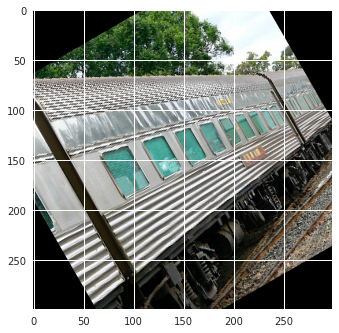

In [57]:
with tf.Session() as sess:
    print("Running...")
    x_np = sess.run(x, feed_dict={
        x_input: x_batch[:1],
        transform: [[0,0,30]],
    })
plt.imshow(x_np[0])
plt.show()

# Look at risk and coverage

In [8]:
# Collect all the logits and images in arrays
import os
image_paths = image_paths_bicycle + image_paths_bird

# bird is one
y_true = np.concatenate([np.zeros((len(image_paths_bicycle),)), np.ones((len(image_paths_bird),))])

In [9]:
batch_size = 32
from tqdm import tqdm as tqdm

def to_batches(iterable, batch_size):
    return [iterable[i * batch_size:(i + 1) * batch_size]
          for i in range((len(iterable) + batch_size - 1) // batch_size)]

image_patch_batches = to_batches(image_paths, batch_size)

preds = []
for batch in tqdm(image_patch_batches):
    x_batch = []
    for img_path in batch:
        img = image.load_img(img_path, target_size=(299, 299))
        x_batch.append(image.img_to_array(img))

    x_batch = np.stack(x_batch)
    x_batch = preprocess_input(x_batch)
    preds.append(model.predict(x_batch))
    
preds = np.concatenate(preds)
        

100%|██████████| 32/32 [00:12<00:00,  2.62it/s]


In [10]:
len(preds)

1000

In [17]:
# TODO: See if more classes helps here
BIRD_CLASSES = list(range(80,100+1))
BICYCLE_CLASSES = [671, 444]

print(BIRD_CLASSES)

bird_preds = np.max(preds[:, BIRD_CLASSES], axis=1)
bicycle_preds = np.max(preds[:, BICYCLE_CLASSES], axis=1)


[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [18]:
is_correct = (bird_preds > bicycle_preds) == y_true.astype(np.bool)
print("accuracy: ")
np.mean(is_correct)

# Previous: 0.964517625231911
# use my graphing code

accuracy: 


0.998

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


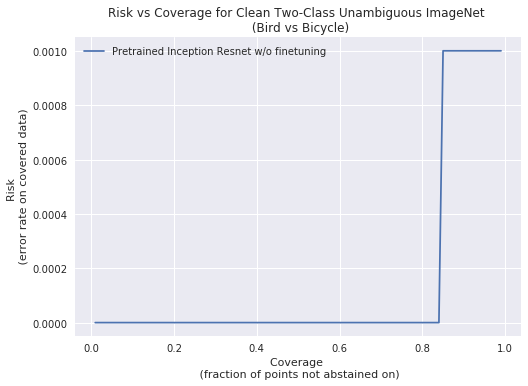

In [19]:

labels = bird_preds > bicycle_preds
confidences = np.abs(bird_preds - bicycle_preds)


def plot_confident_error_rate(labels, confidences, y_true, title="Risk vs Coverage"):
    sorted_confidences = list(sorted(confidences, reverse=True))

    coverages = np.linspace(0.01, .99, 99)
    cov_to_confident_error_idxs = []

    for coverage in coverages:    
        threshold = sorted_confidences[int(coverage * len(labels))]
        confident_mask = confidences >= threshold
        confident_error_mask = (y_true != labels) * confident_mask
        confident_error_idx = confident_error_mask.nonzero()[0]
        
        cov_to_confident_error_idxs.append(confident_error_idx)
        
    plt.plot(coverages, [float(len(idxs)) / len(labels) for idxs in cov_to_confident_error_idxs])
    plt.title(title)
    plt.ylabel("Risk \n (error rate on covered data)")
    plt.xlabel("Coverage \n (fraction of points not abstained on)")
    
    plt.legend(["Pretrained Inception Resnet w/o finetuning"])
    plt.show()
    return cov_to_confident_error_idxs
    
cov_to_confident_error_idxs = plot_confident_error_rate(
    labels, confidences, y_true, title="Risk vs Coverage for Clean Two-Class Unambiguous ImageNet \n (Bird vs Bicycle)")

In [20]:
print(len(cov_to_confident_error_idxs))

99


True: bicycle
Pred: bird


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


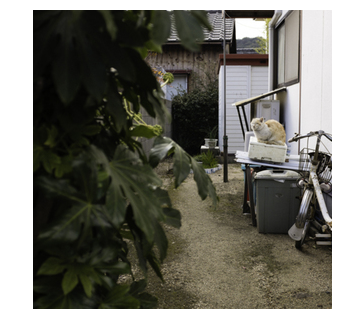

In [22]:
incorrect_idxs = cov_to_confident_error_idxs[90]

for idx in incorrect_idxs:
    print("True: %s" %('bird' if y_true[idx] else 'bicycle'))
    print("Pred: %s" %('bird' if labels[idx] else 'bicycle'))
#     print(np.argmax(preds[idx, BOAT_CLASSES]))
    show_image(image_paths[idx])